# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#ffn7r Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs6 = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
#Define base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Create list to store data extracted from API 
City=[]
Country=[]
Date=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
lat=[]
lng=[]

#Use for loop to for repeated API requests
set_number=1
for i in range(len(cities)):
    query_url = base_url + "appid=" + weather_api_key + "&q=" + str(cities[i])
    response=requests.get(query_url)
    #limit request per minute to within limit
    time.sleep(1.05)
    response_answer=response.json()
    #Use exception handling to enable code skip when lack data about requested city
    try:
        City.append(response_answer["name"])
        Country.append(response_answer["sys"]["country"])
        Date.append(response_answer["dt"])
        Max_Temp.append(response_answer["main"]["temp_max"])
        Humidity.append(response_answer["main"]["humidity"])
        Cloudiness.append(response_answer["clouds"]["all"])
        Wind_Speed.append(response_answer["wind"]["speed"])
        lat.append(response_answer["coord"]["lat"])
        lng.append(response_answer["coord"]["lon"])
        print(f"Processing Record {(i+1)-49*(set_number-1)} of Set {set_number} | {cities[i]}")
    except KeyError:
        print("City not found. Skipping...")
    if (i+1) % 49==0:
        set_number=set_number+1
    if i==len(cities)-1:
        print("-------------------------------")
        print("Data Retrieval Complete")
        print("-------------------------------")
        


Processing Record 1 of Set 1 | north bend
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | mizan teferi
Processing Record 4 of Set 1 | hovd
Processing Record 5 of Set 1 | mgandu
City not found. Skipping...
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | komsomolskiy
City not found. Skipping...
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | joensuu
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | nome
City not found. Skipping...
Processing Record 18 of Set 1 | necochea
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | van
Processing Record 22 of Set 1 | camacha
Processing Record 23 of Set 1 | quatre cocos
Processing Record 24 of Set 1 | barrow
Processing Record 25 of Set 1 | canillo
Processing Record 26 of Set 

Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | itarema
Processing Record 11 of Set 5 | bengkulu
Processing Record 12 of Set 5 | ndago
Processing Record 13 of Set 5 | yulara
Processing Record 14 of Set 5 | cidreira
Processing Record 15 of Set 5 | olafsvik
Processing Record 16 of Set 5 | rio gallegos
Processing Record 17 of Set 5 | lebu
Processing Record 18 of Set 5 | ribeira grande
Processing Record 19 of Set 5 | leh
City not found. Skipping...
Processing Record 21 of Set 5 | guerrero negro
Processing Record 22 of Set 5 | prince rupert
Processing Record 23 of Set 5 | qabaqcol
Processing Record 24 of Set 5 | el cope
Processing Record 25 of Set 5 | ternuvate
Processing Record 26 of Set 5 | smoky lake
Processing Record 27 of Set 5 | sattur
Processing Record 28 of Set 5 | tadine
Processing Record 29 of Set 5 | brawley
Processing Record 30 of Set 5 | anito
Processing Record 31 of Set 5 | tucuma
Processing Record 32 of Set 5 | pangnirtung
Processing Record 33 of Set 5

Processing Record 18 of Set 9 | french harbor
Processing Record 19 of Set 9 | cabinda
Processing Record 20 of Set 9 | bambous virieux
Processing Record 21 of Set 9 | saint-joseph
Processing Record 22 of Set 9 | la ronge
Processing Record 23 of Set 9 | san pedro
Processing Record 24 of Set 9 | ilulissat
Processing Record 25 of Set 9 | podgornoye
Processing Record 26 of Set 9 | umea
Processing Record 27 of Set 9 | shenzhen
Processing Record 28 of Set 9 | salalah
Processing Record 29 of Set 9 | tazovskiy
Processing Record 30 of Set 9 | yangjiang
Processing Record 31 of Set 9 | fasano
Processing Record 32 of Set 9 | athabasca
Processing Record 33 of Set 9 | saint george
Processing Record 34 of Set 9 | mehtar lam
Processing Record 35 of Set 9 | kiomboi
Processing Record 36 of Set 9 | belyy yar
Processing Record 37 of Set 9 | constitucion
Processing Record 38 of Set 9 | eyl
Processing Record 39 of Set 9 | maromitsa
Processing Record 40 of Set 9 | chapais
Processing Record 41 of Set 9 | walvi

Processing Record 23 of Set 13 | moussoro
Processing Record 24 of Set 13 | topolobampo
Processing Record 25 of Set 13 | koundara
Processing Record 26 of Set 13 | havoysund
City not found. Skipping...
Processing Record 28 of Set 13 | vila velha
Processing Record 29 of Set 13 | acapulco
Processing Record 30 of Set 13 | shimoda
Processing Record 31 of Set 13 | ca mau
Processing Record 32 of Set 13 | bereda
Processing Record 33 of Set 13 | taoudenni
Processing Record 34 of Set 13 | ulladulla
Processing Record 35 of Set 13 | fortuna
Processing Record 36 of Set 13 | ukiah
Processing Record 37 of Set 13 | pochutla
Processing Record 38 of Set 13 | arecibo
Processing Record 39 of Set 13 | sarangani
City not found. Skipping...
Processing Record 41 of Set 13 | denpasar
Processing Record 42 of Set 13 | cleveland
Processing Record 43 of Set 13 | eureka
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
Max_Temp1=[v* (9/5) - 459.67 for v in Max_Temp]
#Create DataFrame
City_df=pd.DataFrame({
    "City":City,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":Max_Temp1,
    "Wind Speed":Wind_Speed
})

#Export DataFrame to csv
City_df.to_csv("cities.csv")

#Count number of data point for each variable
City_df.count()

City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Lat           586
Lng           586
Max Temp      586
Wind Speed    586
dtype: int64

In [67]:
#Display DataFrame
City_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,North Bend,1,US,1584037641,61,43.41,-124.22,48.992,4.10
1,Hambantota,51,LK,1584037896,100,6.12,81.12,77.000,1.50
2,Mīzan Teferī,59,ET,1584037897,70,6.98,35.58,69.620,1.76
3,Khovd,0,MN,1584037874,43,48.01,91.64,12.020,0.85
4,Mgandu,84,TZ,1584037900,96,-5.95,34.13,65.120,1.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

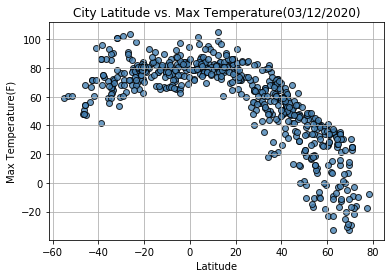

In [68]:
#Create Latitude vs. Temperature Plot
plt.scatter(City_df["Lat"],City_df["Max Temp"],facecolors="steelblue", edgecolors="black",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature(03/12/2020)")
plt.grid()

#### Latitude vs. Humidity Plot

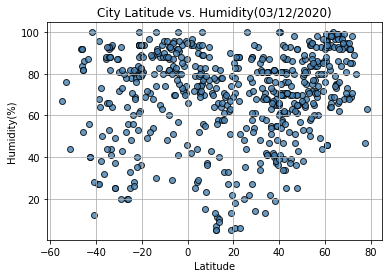

In [45]:
#Create Latitude vs. Humidity Plot
plt.scatter(City_df["Lat"],City_df["Humidity"],facecolors="steelblue", edgecolors="black",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity(03/12/2020)")
plt.grid()

#### Latitude vs. Cloudiness Plot

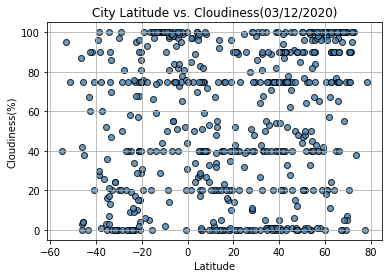

In [46]:
#Create Latitude vs. Cloudiness Plot
plt.scatter(City_df["Lat"],City_df["Cloudiness"],facecolors="steelblue", edgecolors="black",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(03/12/2020)")
plt.grid()

#### Latitude vs. Wind Speed Plot

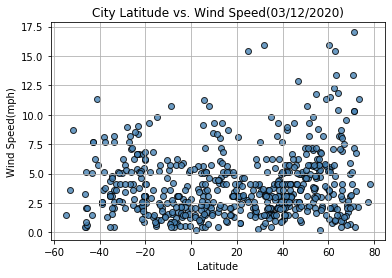

In [47]:
#Create Latitude vs. Wind Speed Plot
plt.scatter(City_df["Lat"],City_df["Wind Speed"],facecolors="steelblue", edgecolors="black",alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed(03/12/2020)")
plt.grid()

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_regression(x_values, y_values,x_label,y_label,hemisphere):
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #Define regress value and regression equation
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plot scatter plot
    plt.scatter(x_values,y_values,color="blue",alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    #Choose best position for annotation of regression line
    rangesx=(x_values.max()-x_values.min())
    rangesy=(y_values.max()-y_values.min())
    plt.ylim(y_values.min()-rangesy/5, y_values.max()+rangesy/6)
    #Plot regression line with annotation
    plt.annotate(line_eq,(x_values.min()+rangesx/4,y_values.min()-rangesy/6),fontsize=15,color="red")
    #Add x and y axis label and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs. {y_label} in {hemisphere} Hemisphere")
    #Print r squared value
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [49]:
# Create Northern and Southern Hemisphere DataFrames
City_North=City_df[City_df["Lat"]>0]
City_South=City_df[City_df["Lat"]<0]
City_South.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Mgandu,84,TZ,1584037900,96,-5.95,34.13,291.55,1.77
5,Hobart,60,AU,1584037802,40,-42.88,147.33,295.15,7.70
7,Castro,19,BR,1584037905,48,-24.79,-50.01,299.75,2.85
8,Rikitea,17,PF,1584037906,80,-23.12,-134.97,298.15,9.03
9,Ushuaia,40,AR,1584037628,67,-54.80,-68.30,288.15,1.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8556846083913768


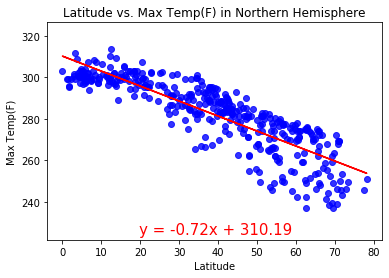

In [50]:
#Plot Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plot_regression(City_North["Lat"], City_North["Max Temp"],"Latitude","Max Temp(F)","Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.37881714542710715


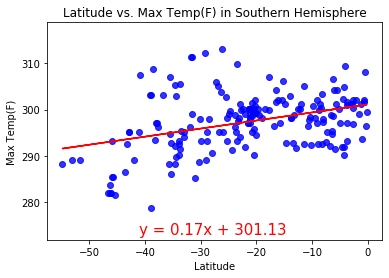

In [51]:
#Plot Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plot_regression(City_South["Lat"], City_South["Max Temp"],"Latitude","Max Temp(F)","Southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3123045625596759


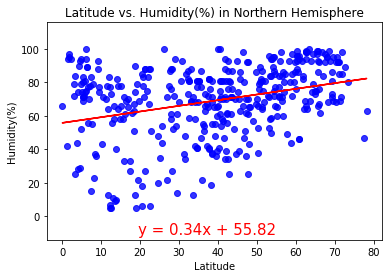

In [52]:
#Plot Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_regression(City_North["Lat"], City_North["Humidity"],"Latitude","Humidity(%)","Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26613319985403716


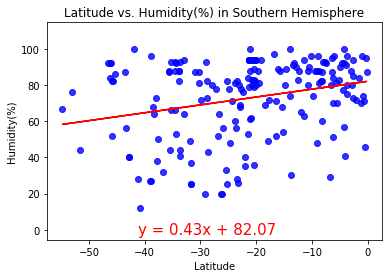

In [53]:
#Plot Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_regression(City_South["Lat"], City_South["Humidity"],"Latitude","Humidity(%)","Southern")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24152980526758916


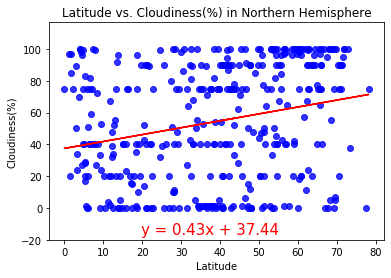

In [54]:
#Plot Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plot_regression(City_North["Lat"], City_North["Cloudiness"],"Latitude","Cloudiness(%)","Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34403504795020917


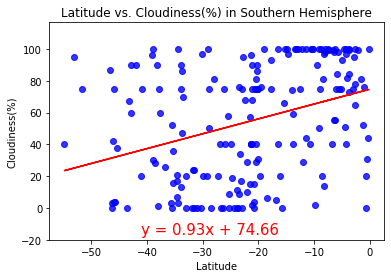

In [55]:
#Plot Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plot_regression(City_South["Lat"], City_South["Cloudiness"],"Latitude","Cloudiness(%)","Southern")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19748478548804166


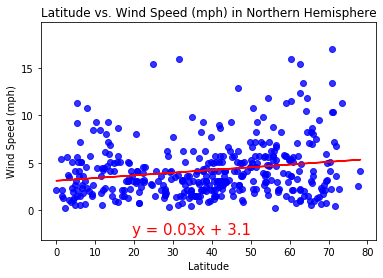

In [56]:
#Plot Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_regression(City_North["Lat"], City_North["Wind Speed"],"Latitude","Wind Speed (mph)","Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22185954614164805


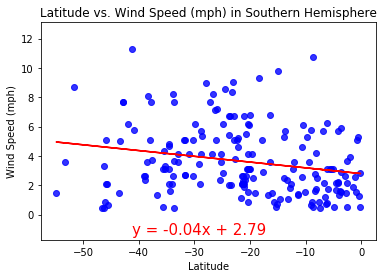

In [57]:
#Plot Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_regression(City_South["Lat"], City_South["Wind Speed"],"Latitude","Wind Speed (mph)","Southern")